In [28]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

In [18]:
points, labels = make_moons(n_samples=2000, shuffle=False ,noise=0.1)

In [19]:
points_l = np.array((points[0], points[500], points[999], points[1300], points[1500], points[1800]))
labels_l = np.array((labels[0], labels[500], labels[999], labels[1300], labels[1500], labels[1800]))

In [20]:
# print(points[0], labels[0], points[500], labels[500], points[999], labels[999])
# print(points[1300], labels[1300], points[1500], labels[1500], points[1800], labels[1800])

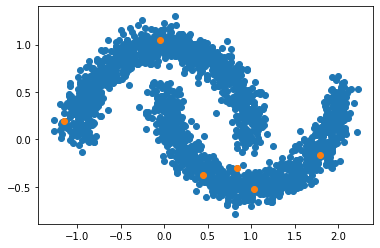

In [21]:
plt.scatter(points[:,0],points[:,1])
plt.scatter(points_l[:,0],points_l[:,1])

In [23]:
class TMClassifier(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.Sigmoid(),
            nn.Linear(in_features=8, out_features=8),
            nn.Sigmoid(),
            nn.Linear(in_features=8, out_features=2),
            nn.Sigmoid()
        )

        self.init_weight()

    def init_weight(self):
        for layer in self.layers:
            if(isinstance(layer, nn.Linear)):
                nn.init.uniform_(layer.weight, -0.1, 0.1)

    def foward(self, x):
        return self.layers(x)

In [24]:
supervised = TMClassifier()
pseudoLabel = TMClassifier()
metaPseudoLabel = TMClassifier()
lr = 0.1
opt_s = torch.optim.SGD(supervised.parameters(), lr=lr)
opt_pl = torch.optim.SGD(pseudoLabel.parameters(), lr=lr)
opt_mpl = torch.optim.SGD(metaPseudoLabel.parameters(), lr=lr)

In [25]:
creterion = nn.CrossEntropyLoss()

In [29]:
class MyDataset(Dataset):
    def __init__(self, x_data, y_data, transform=None):
        self.x_data = x_data
        self.y_data = y_data
        self.transform = transform
        self.len = len(y_data)
    
    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]
        
        if self.transform:
            sample = self.transform(sample)   #self.transform이 None이 아니라면 전처리
        return sample 
    
    def __len__(self):
        return self.len

In [31]:
labeledData = MyDataset(points_l, labels_l)
unlabeledData = MyDataset(points, labels_l)

labeledLoader = DataLoader(labeledData, batch_size=6, shuffle=True)
unlabeledLoader = DataLoader(unlabeledData, batch_size=6, shuffle=True)

In [ ]:
for epoch in range(500):
    for point, label in labeledLoader:
        